In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:5], y[:5]

(array([[13.78731721,  1.73323541],
        [10.68075246,  3.87600675],
        [ 8.09139034,  0.36429043],
        [10.80129018,  6.34922981],
        [ 8.78819007,  2.53766878]]),
 array([0, 1, 1, 1, 0]))

In [3]:
def get_class_colour(class_label):
    return 'green' if class_label else 'blue'

In [4]:
def plot_points(X, y, new_points=None, new_prediction=None, nearest_points=None, file_name=None):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolor='black', alpha=0.3)
    
    if new_points is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c='black', s=100, edgecolors='black')
    
    if new_prediction is not None:
        plt.scatter(new_points[:, 0], new_points[:, 1], c=[get_class_colour(y_i) for y_i in new_prediction], 
                    s=100, edgecolors='black')
        
    if nearest_points is not None:
        plt.scatter(nearest_points[:, 0], nearest_points[:, 1], c='red', s=100, edgecolors='black')
        
    plt.title('Classification problem \n What is the color for the new (x1, x2) pair?')
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    
    if file_name:
        plt.savefig(file_name)

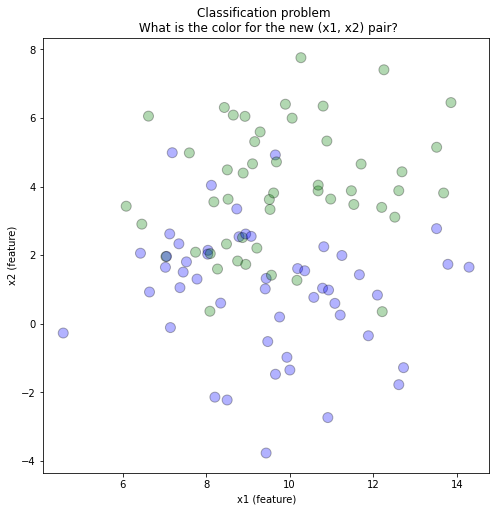

In [5]:
plot_points(X, y)

In [6]:
X_new = np.array([[12, 6]])

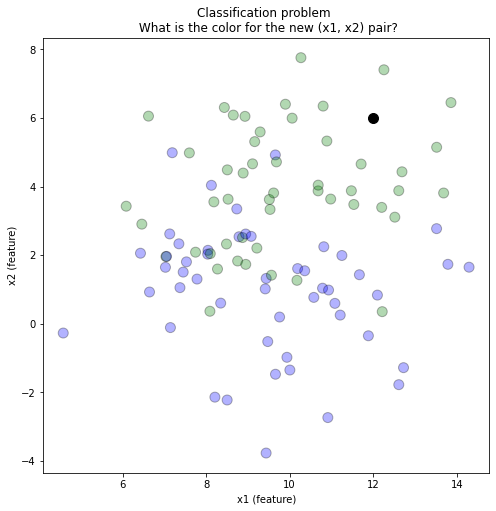

In [7]:
plot_points(X, y, new_points=X_new)

In [8]:
from scipy.spatial.distance import euclidean

In [9]:
def find_nearest_point_index(x_new, X):
    d_min = euclidean(x_new, X[0])
    min_idx = 0
    for idx in range(1, X.shape[0]):
        d = euclidean(x_new, X[idx])
        if d < d_min:
            d_min = d
            min_idx = idx
    return min_idx

In [10]:
min_idx = find_nearest_point_index(X_new, X)

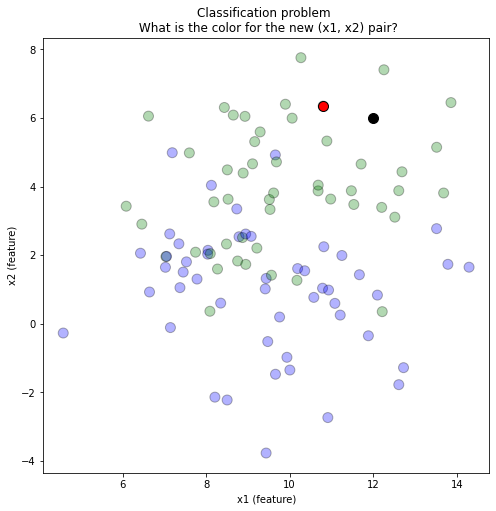

In [11]:
plot_points(X, y, new_points=X_new, nearest_points=X[[min_idx]])

In [12]:
def predict_class(x_new, X, y):
    min_idx = find_nearest_point_index(x_new, X)
    return y[min_idx]

In [13]:
y_new = predict_class(X_new, X, y)

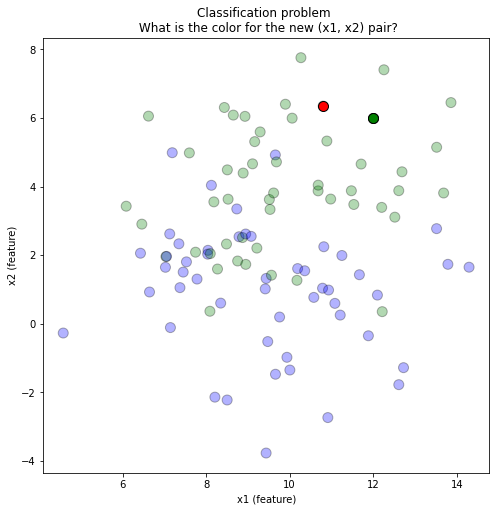

In [14]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

In [15]:
X_new = np.array([[10.2, 2.5]])
min_idx = find_nearest_point_index(X_new, X)
y_new = predict_class(X_new, X, y)

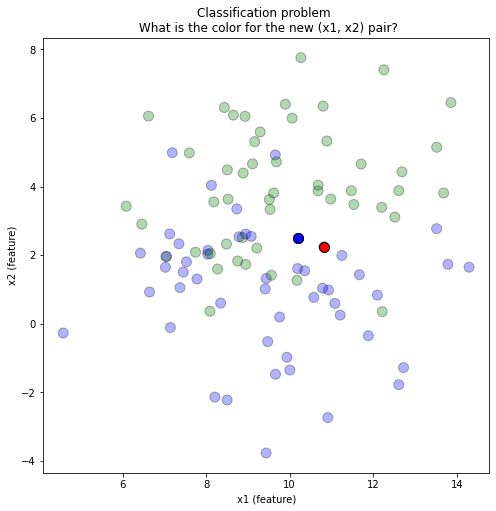

In [16]:
plot_points(X, y, new_points=X_new, new_prediction=[y_new], nearest_points=X[[min_idx]])

## Sklearn

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

In [19]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
y_pred = knn.predict(X_new) 

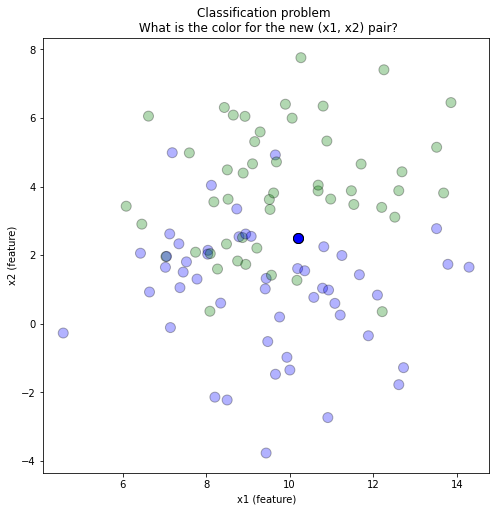

In [21]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

In [22]:
X_new = np.c_[np.random.randint(5, 15, 10), np.random.randint(-2, 8, 10)]

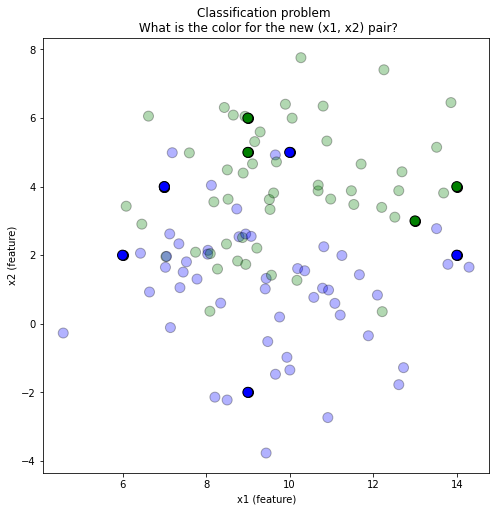

In [23]:
plot_points(X, y, new_points=X_new, new_prediction=knn.predict(X_new))

In [24]:
from scipy.spatial.distance import cdist # парные расстояния между объектами
from collections import Counter

In [25]:
def predict_class(x_new, X, y, k=3):
    dist = cdist(x_new, X)
    
    # argpartition находит отсортированные индексы
    nearest_y = y[np.argpartition(dist, k, axis=1)[:, :k]]
    return np.array([Counter(row).most_common(1)[0][0] for row in nearest_y])

In [26]:
y_pred = predict_class(X_new, X, y, k=3)

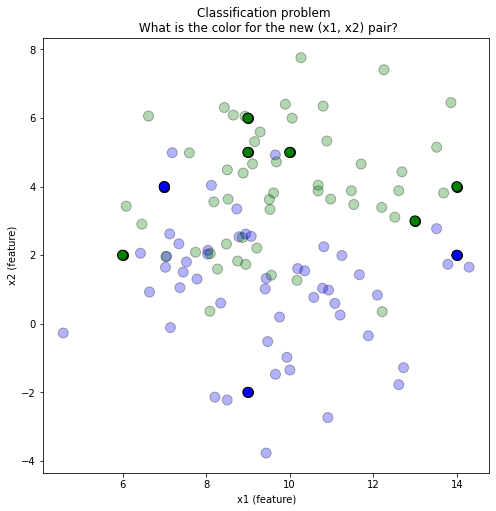

In [27]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
y_pred = knn.predict(X_new)

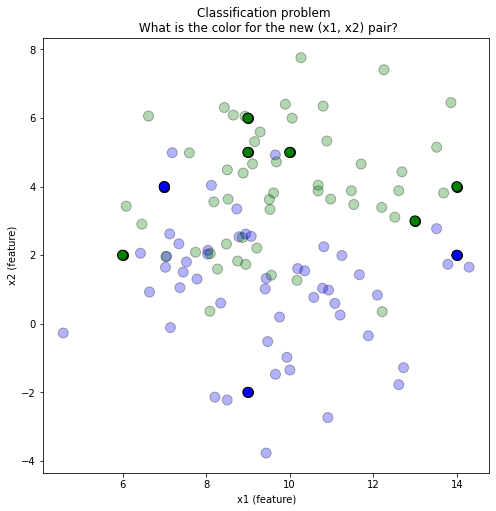

In [31]:
plot_points(X, y, new_points=X_new, new_prediction=y_pred)

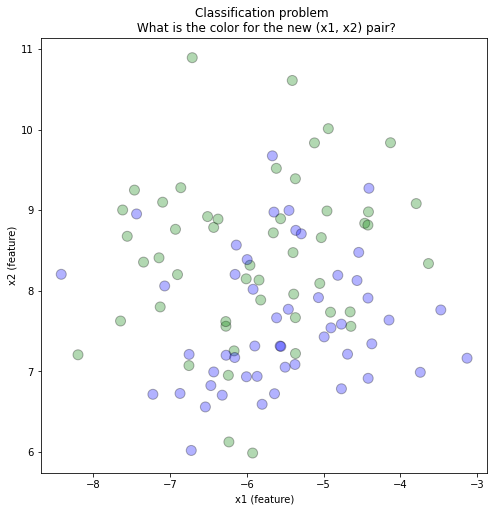

In [32]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)
plot_points(X, y)

## Влияние числа соседей k

In [33]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
x_pred = np.c_[(xx.ravel(), yy.ravel())]

In [34]:
def plot_knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(x_pred)
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

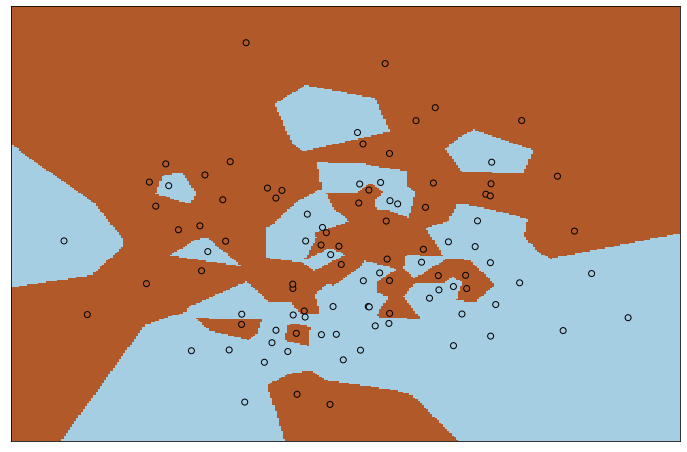

In [35]:
plot_knn_classifier(1)

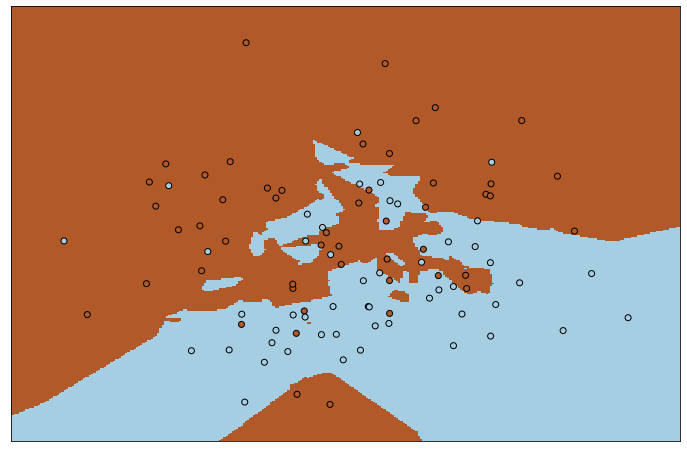

In [36]:
plot_knn_classifier(3)

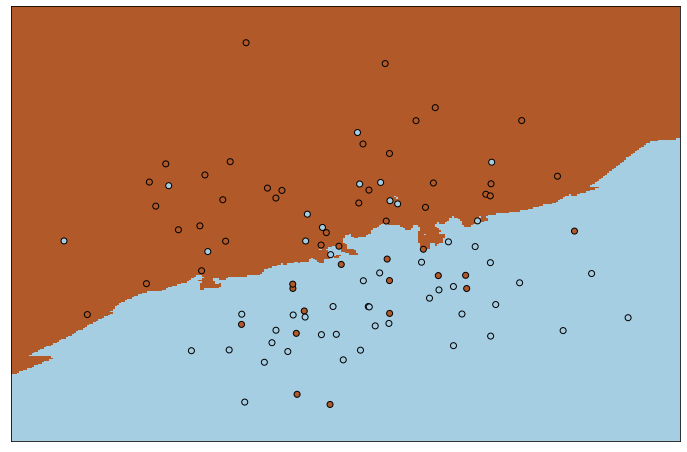

In [37]:
plot_knn_classifier(30)

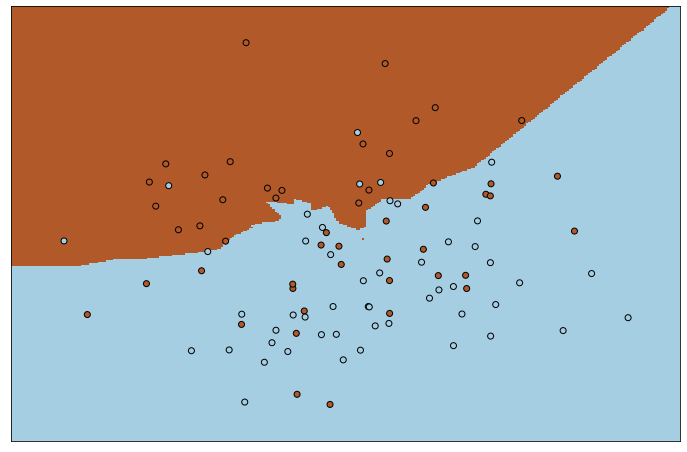

In [38]:
plot_knn_classifier(90)

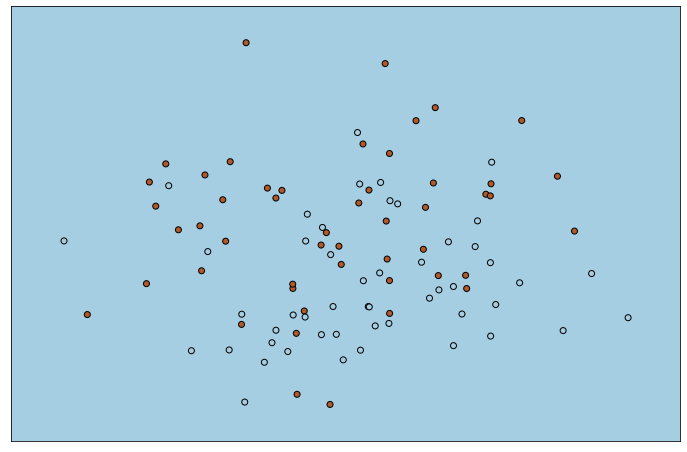

In [39]:
plot_knn_classifier(100)

## Нормализация данных

In [40]:
X, y = datasets.make_blobs(n_samples=100, random_state=4, centers=2, cluster_std=2)
X[:, 1] *= 100000000
X[:5], y[:5]

(array([[1.37873172e+01, 1.73323541e+08],
        [1.06807525e+01, 3.87600675e+08],
        [8.09139034e+00, 3.64290431e+07],
        [1.08012902e+01, 6.34922981e+08],
        [8.78819007e+00, 2.53766878e+08]]),
 array([0, 1, 1, 1, 0]))

In [41]:
def plot_points_scaled(X, y, new_point=None, new_prediction=None, nearest_point=None, file_name=None):
    plt.scatter(X[:, 0], X[:, 1], c=[get_class_colour(y_i) for y_i in y], s=100, edgecolors='black', alpha=0.3)
    plt.figure(1, figsize=(12, 8))
    plt.title('Classification problem \n What is the color for the new (x1, x2) pair?')
    plt.xlabel('x1 (feature)')
    plt.ylabel('x2 (feature)')
    plt.gca().set_aspect('equal', adjustable='datalim')
    if file_name:
        plt.savefig(file_name)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print('Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nF1-score: {:.3f}'.format(
        accuracy, precision, recall, f1))

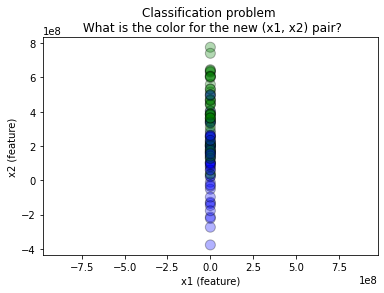

In [44]:
plot_points_scaled(X, y)

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
quality(y_pred, y)

Accuracy: 0.810
Precision: 0.760
Recall: 0.844
F1-score: 0.800


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
X_scaled = MinMaxScaler().fit_transform(X)

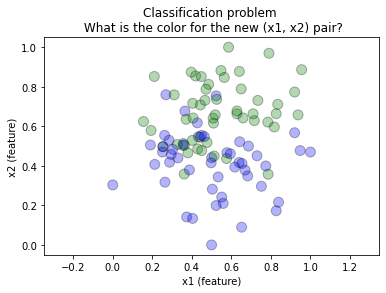

In [48]:
plot_points_scaled(X_scaled, y)

In [49]:
knn.fit(X_scaled, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [50]:
y_pred = knn.predict(X_scaled)
quality(y_pred, y)

Accuracy: 0.870
Precision: 0.860
Recall: 0.878
F1-score: 0.869


In [51]:
X, y = datasets.make_blobs(n_samples=100, random_state=5, centers=2)

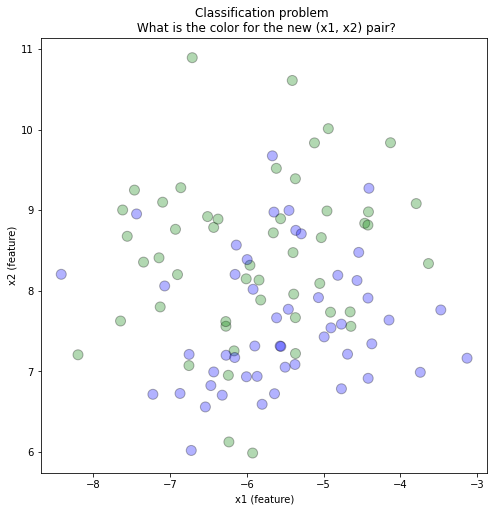

In [52]:
plot_points(X, y)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 2), (40, 2), (60,), (40,))

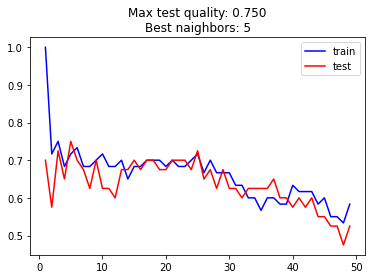

In [56]:
neighbors = range(1, 50)
accuracy_train = []
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title('Max test quality: {:.3f}\nBest naighbors: {}'.format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

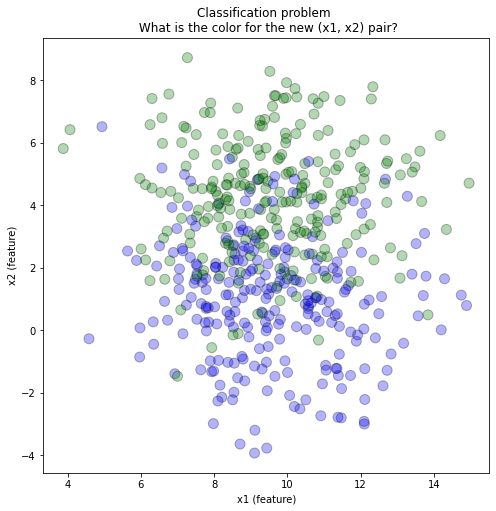

In [57]:
X, y = datasets.make_blobs(n_samples=500, random_state=4, centers=2, cluster_std=2)
plot_points(X, y)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (200, 2), (300,), (200,))

In [59]:
from sklearn.metrics import accuracy_score

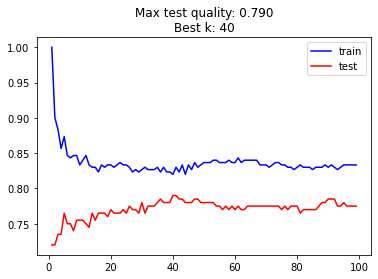

In [60]:
neighbors = range(1, 100)
accuracy_train = []
accuracy_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    accuracy_train.append(accuracy_score(knn.predict(X_train), y_train))
    accuracy_test.append(accuracy_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, accuracy_train, color='blue', label='train')
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title('Max test quality: {:.3f}\nBest k: {}'.format(max(accuracy_test), np.argmax(accuracy_test)+1))
plt.legend()
plt.show()

## k-fold cross-validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)

In [63]:
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [65]:
print(scores)
print('mean - ', scores.mean())
print('std  - ', scores.std())

[0.8  0.78 0.8  0.77 0.72]
mean -  0.774
std  -  0.029393876913398165
